# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.5 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 66.1.1 which is incompatible.
L

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "khadijamahmoud"
kaggle_key = "c5670daf73f151d0f6ef88931504cd00"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms


In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 61.8MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
# https://stackoverflow.com/questions/60458384

import datetime as dt


parser = lambda date: pd.datetime.strptime(date, '%Y-%m-%d  %H:%M:%S')

train = pd.read_csv("train.csv", parse_dates=[0], date_parser=parser)

train.head()

<ipython-input-6-8c89d0984a36>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  parser = lambda date: pd.datetime.strptime(date, '%Y-%m-%d  %H:%M:%S')


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
print(train.info())
print(train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB
None
(10886, 12)


We can see that the date column has a data tybe of datetime

In [9]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv" , parse_dates=[0], date_parser=parser)
test.head()

<ipython-input-6-8c89d0984a36>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  parser = lambda date: pd.datetime.strptime(date, '%Y-%m-%d  %H:%M:%S')


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
print(test.info())
print(test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB
None
(6493, 9)


- we noticed that the number of colmns in the reain data set and in the test data set is no the same
- we get only the common columns and add the count to the train data set as it was not included in the test

In [11]:
import numpy as np

columns=np.intersect1d(train.columns,test.columns)
columns

array(['atemp', 'datetime', 'holiday', 'humidity', 'season', 'temp',
       'weather', 'windspeed', 'workingday'], dtype=object)

In [12]:
# create the new traina and test splits
train=train[np.append(columns,'count')]
test= test[columns]

In [13]:
# Same thing as train and test dataset

submission = pd.read_csv("sampleSubmission.csv" , parse_dates=[0], date_parser=parser)

submission.head()

<ipython-input-6-8c89d0984a36>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  parser = lambda date: pd.datetime.strptime(date, '%Y-%m-%d  %H:%M:%S')


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [14]:

label='count'
predictor = TabularPredictor(label=label, eval_metric='root_mean_squared_error').fit(train, time_limit=600,
                                                                                    presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20230122_190421/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230122_190421/"
AutoGluon Version:  0.6.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

### Review AutoGluon's training run with ranking of models that did the best.

In [15]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.049876      19.721102  550.733457                0.000824           0.269099            3       True         14
1   RandomForestMSE_BAG_L2  -53.339108      14.965076  408.469086                0.696022          30.246987            2       True         12
2          LightGBM_BAG_L2  -55.053548      14.511237  403.276514                0.242183          25.054414            2       True         11
3          CatBoost_BAG_L2  -55.886228      14.376626  439.725471                0.107571          61.503372            2       True         13
4        LightGBMXT_BAG_L2  -60.756587      18.674502  433.659586                4.405448          55.437486            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.045981    0.034146         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.41274077052907,
  'LightGBM_BAG_L1': -131.04840164127194,
  'RandomForestMSE_BAG_L1': -116.

### Create predictions from test dataset

In [16]:
predictions = predictor.predict(test)
predictions.head()

0    23.334629
1    40.458141
2    44.044151
3    47.686329
4    50.588360
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [17]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.603363
std        89.699944
min         3.247609
25%        20.176487
50%        63.608559
75%       167.110306
max       362.090668
Name: count, dtype: float64

In [18]:
# How many negative values do we have?
# there are no -ve values , the min value is 3

In [19]:
# Set them to zero
# None

### Set predictions to submission dataframe, save, and submit

In [20]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [21]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 212kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [22]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2023-01-22 19:15:08  first raw submission               complete  1.79050      1.79050       
submission_new_hpo.csv       2023-01-17 15:56:48  new features with hyperparameters  complete  0.53961      0.53961       
submission_new_hpo.csv       2023-01-17 15:22:53  new features with hyperparameters  complete  0.61364      0.61364       
submission_new_features.csv  2023-01-17 15:11:05  new features                       complete  0.66495      0.66495       


#### Initial score of `1.79707 `

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

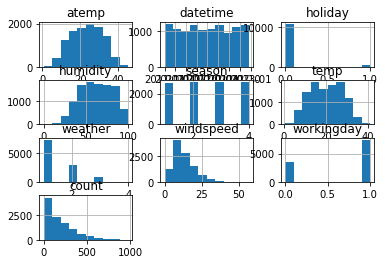

In [23]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
import matplotlib.pyplot as plt
plt.figsize=(30,40)
train.hist();

In [24]:
# create a new feature
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month
train['hour'] = train['datetime'].dt.hour
# do the same to the test dta set
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [25]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] =test["weather"].astype('category')

In [26]:
# View are new feature
train.head()

,atemp,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,count,day,month,hour
0,14.395,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0,16,1,1,0
1,13.635,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0,40,1,1,1
2,13.635,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0,32,1,1,2
3,14.395,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0,13,1,1,3
4,14.395,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0,1,1,1,4


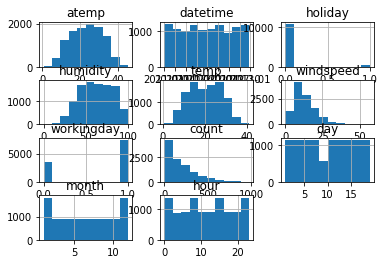

In [27]:
# View histogram of all features again now with the hour feature
plt.figsize=(40,30)
train.hist();

## Step 5: Rerun the model with the same settings as before, just with more features

In [28]:


features=["season","holiday","workingday","weather","temp","humidity","windspeed","count","hour","day","month"]
predictor_new_features = TabularPredictor(label=label, eval_metric='root_mean_squared_error').fit(train[features], time_limit=600,
                                                                                    presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20230122_191513/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230122_191513/"
AutoGluon Version:  0.6.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    10886
Train Data Columns: 10
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [29]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -49.977109      55.971240  499.975916                0.000997           0.382548            3       True         16
1          CatBoost_BAG_L2  -50.360957      54.557339  462.984759                0.130140          71.864473            2       True         13
2     ExtraTreesMSE_BAG_L2  -50.494718      55.127432  399.433661                0.700233           8.313375            2       True         14
3   RandomForestMSE_BAG_L2  -50.796665      55.139870  419.415520                0.712671          28.295234            2       True         12
4          LightGBM_BAG_L2  -51.348061      54.592736  412.992283                0.165537          21.871997            2       True         11
5      WeightedEnsemble_L2  -51.869714      53.009480  358.543200         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -122.85654908089322,
  'KNeighborsDist_BAG_L1': -118.5978900057019

In [30]:
# get the predictions series
new_predicitons=predictor_new_features.predict(test)
new_predicitons

0        29.758654
1         6.195930
2         5.459188
3         3.673230
4         3.518154
           ...    
6488    191.517853
6489    126.791367
6490     99.838089
6491     79.270584
6492     46.497509
Name: count, Length: 6493, dtype: float32

In [31]:
# describe the new predictions
new_predicitons.describe()

count    6493.000000
mean      190.002701
std       166.105804
min         2.142844
25%        48.457832
50%       153.413315
75%       282.303101
max       810.400635
Name: count, dtype: float64

In [32]:
# Remember to set all negative values to zero
# None

In [33]:
submission_new_features=submission
submission_new_features["count"] = new_predicitons

submission_new_features.to_csv("submission_new_features.csv", index=False)

#new_predicitons.to_csv("submission_new_features.csv", index=False)

In [34]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 212kB/s]
Successfully submitted to Bike Sharing Demand

In [35]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-01-22 19:27:34  new features                       complete  0.53834      0.53834       
submission.csv               2023-01-22 19:15:08  first raw submission               complete  1.79050      1.79050       
submission_new_hpo.csv       2023-01-17 15:56:48  new features with hyperparameters  complete  0.53961      0.53961       
submission_new_hpo.csv       2023-01-17 15:22:53  new features with hyperparameters  complete  0.61364      0.61364       
submission_new_features.csv  2023-01-17 15:11:05  new features                       complete  0.66495      0.66495       
submission.csv               2023-01-17 14:58:31  first raw submission               complete  1.78930      1.78930       
submission.csv  

#### New Score of ` 0.65164`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [36]:


import autogluon.core as ag

nn_options = {  
    'num_epochs': 10, 
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True), 
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}
 # each model type hyperparameters 
hyperparameters = {
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  
                  }  


hyperparameter_tune_kwargs = {  
    'num_trials': 5,
    'scheduler' : 'local',
    'searcher': "auto",
}
predictor_new_hpo = TabularPredictor(label='count',
                                     eval_metric="root_mean_squared_error").fit(train[features],
                                                                                time_limit= 600 ,
                                                                                presets = "best_quality",
                                                                                hyperparameters = hyperparameters,
                                                                                hyperparameter_tune_kwargs = hyperparameter_tune_kwargs)




No model was trained during hyperparameter tuning NeuralNetTorch_BAG_L2... Skipping this model.
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 359.99s of the 173.06s of remaining time.
	-63.8203	 = Validation score   (-root_mean_squared_error)
	0.97s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 427.98s ... Best model: "WeightedEnsemble_L3"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230122_192735/")


In [37]:
'''
predictor_new_hpo = TabularPredictor(label=label, eval_metric='root_mean_squared_error').fit(train, time_limit=600,
                                                                                    presets='best_quality',
                                                                                   # hyperparameters= ['default', 'light', 'very_light', 'toy', 'multimodal'],
                                                                                    hyperparameter_tune_kwargs='auto'
                                                                                    )
'''

"\npredictor_new_hpo = TabularPredictor(label=label, eval_metric='root_mean_squared_error').fit(train, time_limit=600,\n                                                                                    presets='best_quality',\n                                                                                   # hyperparameters= ['default', 'light', 'very_light', 'toy', 'multimodal'],\n                                                                                    hyperparameter_tune_kwargs='auto'\n                                                                                    )\n"

In [38]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3  -63.820251       0.862859  259.631280                0.001234           0.971696            3       True         12
1    LightGBM_BAG_L2/T2  -63.985480       0.861497  234.482488                0.000165          23.457600            2       True          8
2    LightGBM_BAG_L2/T3  -64.446010       0.861460  235.201984                0.000128          24.177095            2       True          9
3    LightGBM_BAG_L2/T1  -64.498717       0.861517  234.813225                0.000185          23.788336            2       True          7
4    LightGBM_BAG_L2/T5  -64.555456       0.861474  235.250728                0.000141          24.225840            2       True         11
5   WeightedEnsemble_L2  -65.213838       0.342485   85.332237                0.000800      

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -66.74042731881096,
  'LightGBM_BAG_L1/T2': -66.0302004742094,
  'LightGBM_BAG_L1/T3': -65.53450933766018,
  'LightGBM_BAG_L1/T4': -130.24135787876617,
  'LightGBM_BAG_L1/T5': -69.49661477125132,
  'WeightedEnsemble_L2': -65.21383828268803,
  'LightGBM_BAG_L2/T1': -64.49871692142578,
  'LightGBM_BAG_L2/T2': -63.985479

In [39]:
hyp_predictions=predictor_new_hpo.predict(test)

In [40]:
hyp_predictions.describe()

count    6493.000000
mean      188.129059
std       164.312836
min         7.280360
25%        50.996708
50%       147.769135
75%       274.484619
max       831.094055
Name: count, dtype: float64

In [41]:
# Remember to set all negative values to zero
# there is no negative values in the predictions, the min value is 8.3

In [42]:
# Same submitting predictions
submission_new_hpo=submission
submission_new_hpo["count"] = hyp_predictions
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [43]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:01<00:00, 135kB/s]
Successfully submitted to Bike Sharing Demand

In [44]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 100

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-01-22 19:34:51  new features with hyperparameters  complete  0.52883      0.52883       
submission_new_features.csv  2023-01-22 19:27:34  new features                       complete  0.53834      0.53834       
submission.csv               2023-01-22 19:15:08  first raw submission               complete  1.79050      1.79050       
submission_new_hpo.csv       2023-01-17 15:56:48  new features with hyperparameters  complete  0.53961      0.53961       
submission_new_hpo.csv       2023-01-17 15:22:53  new features with hyperparameters  complete  0.61364      0.61364       
submission_new_features.csv  2023-01-17 15:11:05  new features                       complete  0.66495      0.66495       
submission.csv  

#### New Score of `0.53961`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

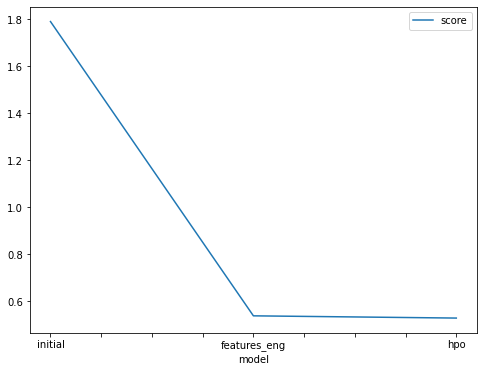

In [48]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "model": ["initial", "features_eng", "hpo"],
        "score": [1.79050,  0.53834 , 0.52883]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

### Hyperparameter table

In [49]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default", "default", "GBM:'num_boost_round': 100,'num_leaves'(lower=26, upper=66, default=36)"],
    "hpo2": ["default", "default", "NN_TORCH (num_epochs': 10), activation('relu', 'softrelu', 'tanh')"],
    "hpo3": ["default", "default", "searcher: 'auto', num_trials: 5,scheduler: local"],
    "score":  [1.79050,  0.53834 , 0.52883]
})






,model,hpo1,hpo2,hpo3,score
0,initial,default,default,default,1.79050
1,add_features,default,default,default,0.53834
2,hpo,"GBM:'num_boost_round': 100,'num_leaves'(lower=26, upper=66, default=36)","NN_TORCH (num_epochs': 10), activation('relu', 'softrelu', 'tanh')","searcher: 'auto', num_trials: 5,scheduler: local",0.52883


In [1]:
!pip3 install --upgrade --user nbconvert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.8/274.8 kB 295.2 kB/s eta 0:00:001m298.9 kB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
